In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROOQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama-3.1-8b-instant",temperature=0.7)

result=llm.invoke("Howdy")
result

AIMessage(content="Howdy back at ya. How's your day goin'?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 37, 'total_tokens': 51, 'completion_time': 0.020841617, 'prompt_time': 0.006278667, 'queue_time': 0.436761711, 'total_time': 0.027120284}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7083106d2c', 'finish_reason': 'stop', 'logprobs': None}, id='run--e8efa065-ade0-4c4d-a73e-5e5afdf6eec3-0', usage_metadata={'input_tokens': 37, 'output_tokens': 14, 'total_tokens': 51})

In [2]:
from typing import TypedDict

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [7]:
# Nodes
def generate_characters(state:State):
    """Generate characters"""
    characters = llm.invoke(f"Generate two characters with name and brief peculiar traits for the story about {state['topic']}.")
    return {"characters":characters.content}

def generate_settings(state:State):
    """Generate settings"""
    settings = llm.invoke(f"Generate a setting for the story about {state['topic']}. Do not deviate from the topic.")
    return {"settings":settings.content}

def generate_premises(state:State):
    """Generate premises"""
    premises = llm.invoke(f"Generate a short premise for the story about {state['topic']}.")
    return {"premises":premises.content}

def generate_story_intro(state:State):
    """Generate story intro"""
    story_intro = llm.invoke(
        f"""
ONLY OUTPUT THE STORY TEXT. DO NOT ADD ANY TITLES, HEADINGS, SEPARATORS, INTRODUCTIONS, EXPLANATIONS, OR COMMENTARY. 
Write a short story intro using the following elements. 
The story must be concise, clear, and short enough to read aloud( STRICTLY ABOUT 80-100 words).  
Characters: {state['characters']}
Settings: {state['settings']}
Premises: {state['premises']}
"""

)
    return {"story_intro":story_intro.content}

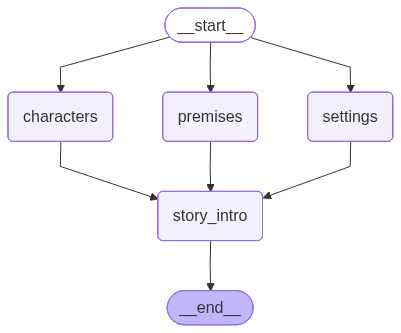

In [8]:
# Build State Graph
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END

graph=StateGraph(State)

# Adding nodes to the graph
graph.add_node("characters",generate_characters)
graph.add_node("settings",generate_settings)
graph.add_node("premises",generate_premises)
graph.add_node("story_intro",generate_story_intro)

# Adding edges
graph.add_edge(START,"characters")
graph.add_edge(START,"settings")
graph.add_edge(START,"premises")
graph.add_edge("characters","story_intro")
graph.add_edge("settings","story_intro")
graph.add_edge("premises","story_intro")
graph.add_edge("story_intro",END)

#Compile graph
graph=graph.compile()

graph_image=graph.get_graph().draw_mermaid_png()
display(Image(graph_image))
 

In [14]:
result=graph.invoke({"topic":"Musician falling in love with a singer"})
print(result['story_intro'])

August Wells adjusted his guitar strap for what felt like the hundredth time, his fingers drumming a nervous rhythm on the neck of his instrument. "Come on, Augie, you got this," he muttered to himself, trying to shake off the pre-show jitters. He glanced around the cozy space of the Bluebird Cafe, taking in the dim lighting and the scattered crowd of music lovers. It was a night like any other in Nashville, but for Augie, it was the start of something new. He took a deep breath, letting the familiar scent of wood and sweat wash over him. "Let's do this, old friend," he whispered, his eyes locking onto his guitar as if it were a trusted companion. As he launched into his first chord, the sounds of the city outside melted away, and for a moment, Augie was the only one who mattered.


In [15]:
import subprocess

text = result['story_intro']
if not isinstance(text, str):
    text = str(text)

# Speak immediately (built-in macOS TTS)
subprocess.run(["say", text])

CompletedProcess(args=['say', 'August Wells adjusted his guitar strap for what felt like the hundredth time, his fingers drumming a nervous rhythm on the neck of his instrument. "Come on, Augie, you got this," he muttered to himself, trying to shake off the pre-show jitters. He glanced around the cozy space of the Bluebird Cafe, taking in the dim lighting and the scattered crowd of music lovers. It was a night like any other in Nashville, but for Augie, it was the start of something new. He took a deep breath, letting the familiar scent of wood and sweat wash over him. "Let\'s do this, old friend," he whispered, his eyes locking onto his guitar as if it were a trusted companion. As he launched into his first chord, the sounds of the city outside melted away, and for a moment, Augie was the only one who mattered.'], returncode=0)